# The Sparks Foundation GRIP 2021

## Data Science & Business Analytics Intern

## Task-2: Prediction Using Unsupervised ML ( K-Means Clustering)

## Author: Sagar Kishore Dakua

### #Problem Statement:  Predict the optimum number of clusters from the Iris dataset & represent it visually.

### Importing Libraries:

In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### Importing Iris Dataset:

In [123]:
df = pd.read_csv("C:/Users/speci/Desktop/TSF GRIP OCT/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Visualizing the Dataset in Scatter Plot:

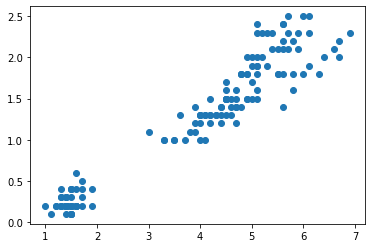

In [107]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])

Hmmm, seems like there are 2 clusters. But, wait let us apply the elbow method to find the optimum cluster value.

### Applying Elbow Method

In [124]:
k_rng = range(1,10)
sse = []
for x in k_rng:
    km = KMeans(n_clusters = x)
    km.fit(df[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

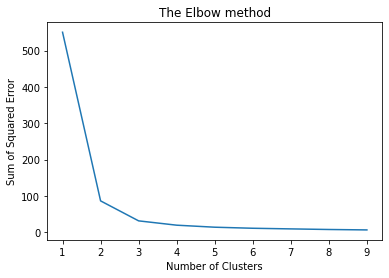

In [125]:
plt.title("The Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.plot(k_rng,sse)

As we can see from the chart above that the optimum value for the number of clusters is 3. So, lets apply KMeans with cluster count as 3.

### Model Fitting:

In [131]:
#Applying value of clusters as 3.
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [132]:
#Predicting the model
y_predicted = km.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [136]:
#Creating a column cluster for y-predicted
df['cluster'] = y_predicted
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,0
146,147,6.3,2.5,5.0,1.9,Iris-virginica,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,0
148,149,6.2,3.4,5.4,2.3,Iris-virginica,0


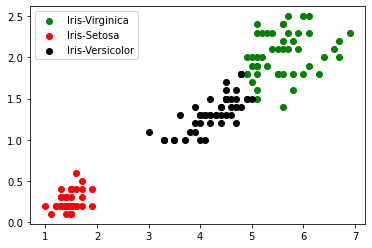

In [138]:
# Creating 3 Dataframes for visualization
df1 = df[df.cluster == 0] # Iris- Virginica
df2 = df[df.cluster == 1] # Iris-Setosa
df3 = df[df.cluster == 2] # Iris-Versicolor
plt.scatter(df1.PetalLengthCm,df1.PetalWidthCm, color = 'green', label = "Iris-Virginica")
plt.scatter(df2.PetalLengthCm,df2.PetalWidthCm, color = 'red', label = "Iris-Setosa")
plt.scatter(df3.PetalLengthCm,df3.PetalWidthCm, color = 'black', label = "Iris-Versicolor")
plt.legend()

But there is a problem, the X & Y axis are not scaled.

### MinMax Scaling

MinMax Scaling Transform features by scaling each feature to a given range.It scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [143]:
Scaler = MinMaxScaler()

In [144]:
#transforming the columns with the current scaled values.
Scaler.fit(df[["PetalWidthCm"]])
df["PetalWidthCm"] = Scaler.transform(df[["PetalWidthCm"]])
Scaler.fit(df[["PetalLengthCm"]])
df["PetalLengthCm"] = Scaler.transform(df[["PetalLengthCm"]])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa,1
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa,1
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa,1
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa,1
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa,1


In [145]:
#Fitting the model once again.
km1 = KMeans(n_clusters = 3)
y_predicted1 = km1.fit_predict(df[['PetalLengthCm','PetalWidthCm']])
y_predicted1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [146]:
#Predicting & adding the values to column cluster once again.
df["cluster"] = y_predicted1
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,0.067797,0.041667,Iris-setosa,1
1,2,4.9,3.0,0.067797,0.041667,Iris-setosa,1
2,3,4.7,3.2,0.050847,0.041667,Iris-setosa,1
3,4,4.6,3.1,0.084746,0.041667,Iris-setosa,1
4,5,5.0,3.6,0.067797,0.041667,Iris-setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,0.711864,0.916667,Iris-virginica,0
146,147,6.3,2.5,0.677966,0.750000,Iris-virginica,0
147,148,6.5,3.0,0.711864,0.791667,Iris-virginica,0
148,149,6.2,3.4,0.745763,0.916667,Iris-virginica,0


### Final Visualization

In [147]:
# Finding the center points of the clusters.
km1.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07864407, 0.06      ],
       [0.55867014, 0.51041667]])

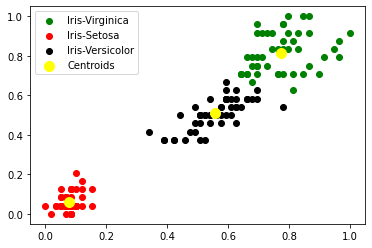

In [154]:
df1 = df[df.cluster == 0] # Iris- Virginica
df2 = df[df.cluster == 1] # Iris-Setosa
df3 = df[df.cluster == 2] # Iris-Versicolor
plt.scatter(df1.PetalLengthCm,df1.PetalWidthCm, color = 'green', label = "Iris-Virginica")
plt.scatter(df2.PetalLengthCm,df2.PetalWidthCm, color = 'red', label = "Iris-Setosa")
plt.scatter(df3.PetalLengthCm,df3.PetalWidthCm, color = 'black', label = "Iris-Versicolor")
plt.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1],s = 100, color = "Yellow", label = "Centroids")
plt.legend()

This concludes the K-means Clustering.

## Thank You!!!